In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_csv('assets/updated_house_df.csv')
df.head()

,land_sale_price,total_sale_price,deed_date,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate,unemploy_rate,pop_growth_rate,covid_cases,is_covid,lumber_price,metals_price,build_price
0,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,RALEIGH,3.08,4.4,0.014689,74599.0,1,365.8,292.2,198.9
1,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,RALEIGH,3.08,4.4,0.014689,74696.0,1,365.8,292.2,198.9
2,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,RALEIGH,3.08,4.4,0.014689,74957.0,1,365.8,292.2,198.9
3,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,RALEIGH,3.08,4.4,0.014689,75183.0,1,365.8,292.2,198.9
4,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,RALEIGH,3.08,4.4,0.014689,75405.0,1,365.8,292.2,198.9


In [3]:
year_list = ['2021', '2020', '2022', '2004', '2015', '2012', '2010', '2008',
       '2014', '2005', '2009', '2003', '2001', '2016', '2011', '2013',
       '2018', '2019', '2017', '2000', '2007', '2006', '2002']

In [4]:
# Create a new dataframe with the data we want to plot
df['year'] = df['deed_date'].apply(lambda x: x.split('-')[0])

house_mean_price_dict = {}
house_median_price_dict = {}
building_mean_price_dict = {}
building_median_price_dict = {}
land_mean_price_dict = {}
land_median_price_dict = {}
for year in year_list:
    house_mean_price_dict[year] = 0
    house_mean_price_dict[year] = (df[df['year'] == year]['total_sale_price'].mean())
    house_median_price_dict[year] = 0
    house_median_price_dict[year] = (df[df['year'] == year]['total_sale_price'].median())
    building_mean_price_dict[year] = 0
    building_mean_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].mean())
    building_median_price_dict[year] = 0
    building_median_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].median())
    land_mean_price_dict[year] = 0
    land_mean_price_dict[year] = (df[df['year'] == year]['land_sale_price'].mean())
    land_median_price_dict[year] = 0
    land_median_price_dict[year] = (df[df['year'] == year]['land_sale_price'].median())


price_summary = pd.DataFrame(house_mean_price_dict.values(), house_mean_price_dict.keys(), columns=['sale_price_mean'])
price_summary['sale_price_median'] = house_median_price_dict.values()
price_summary['building_mean'] = building_mean_price_dict.values()
price_summary['building_median'] = building_median_price_dict.values()
price_summary['land_mean'] = land_mean_price_dict.values()
price_summary['land_median'] = land_median_price_dict.values()
price_summary.reset_index(inplace=True)
price_summary.rename(columns={'index':'year'}, inplace=True)
price_summary.sort_values('year', inplace=True)
price_summary.reset_index(drop=True, inplace=True)

price_summary.head()

,year,sale_price_mean,sale_price_median,building_mean,building_median,land_mean,land_median
0,2000,196779.085498,168500.0,233086.860660,208407.0,15371.262175,0.0
1,2001,198302.046853,167000.0,247600.776621,202949.0,14835.434690,0.0
2,2002,203118.148346,167500.0,231317.369264,203191.0,15193.880683,0.0
3,2003,293418.037965,176000.0,233793.021617,208503.0,15661.790372,0.0
4,2004,223392.919597,184000.0,239428.187660,212826.5,17528.325607,0.0
5,2005,237091.068504,195000.0,242728.938728,214232.0,18209.841840,0.0
6,2006,255758.093890,210750.0,245961.310973,217764.5,20328.071197,0.0
7,2007,263739.186319,218000.0,247027.166317,214275.0,21659.398074,0.0
8,2008,265192.714003,215000.0,253306.948402,217567.0,22348.562861,0.0
9,2009,245811.731011,200000.0,248413.020319,212940.0,21077.094017,0.0


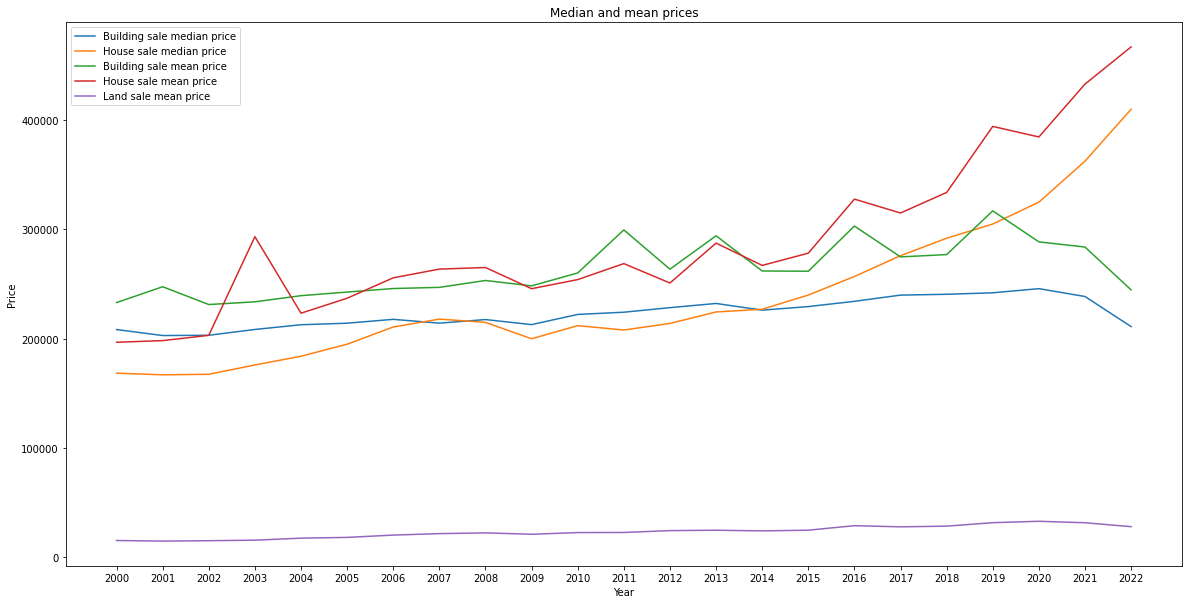

In [5]:
# Create a line chart of the mean and median house prices
plt.figure(figsize=(20,10))
plt.plot(price_summary['year'], price_summary['building_median'], label='Building sale median price')
plt.plot(price_summary['year'], price_summary['sale_price_median'], label='House sale median price')
plt.plot(price_summary['year'], price_summary['building_mean'], label='Building sale mean price')
plt.plot(price_summary['year'], price_summary['sale_price_mean'], label='House sale mean price')
plt.plot(price_summary['year'], price_summary['land_mean'], label='Land sale mean price')

plt.legend()
plt.title('Median and mean prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

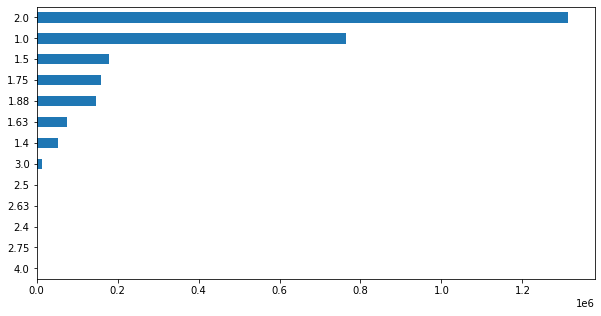

In [10]:
df['story_height'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))

<AxesSubplot:>

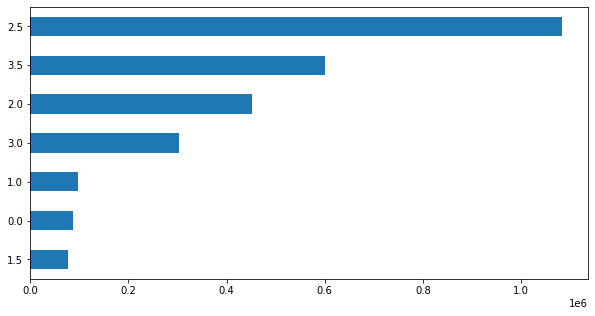

In [11]:
df['bath'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))

<AxesSubplot:>

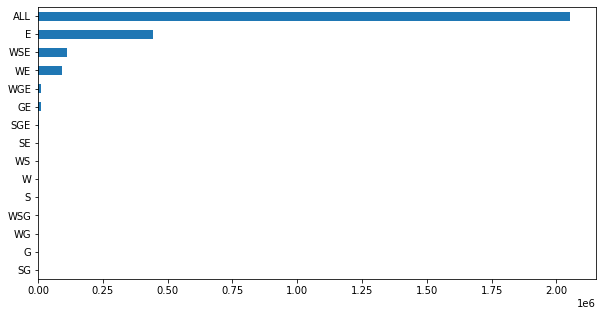

In [12]:
df['utilities'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))

In [23]:
corr_df = df[['total_sale_price', 
              'assessed_building_value', 
              'story_height', 
              'heated_area', 
              'bath', 
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price']].copy()

<AxesSubplot:>

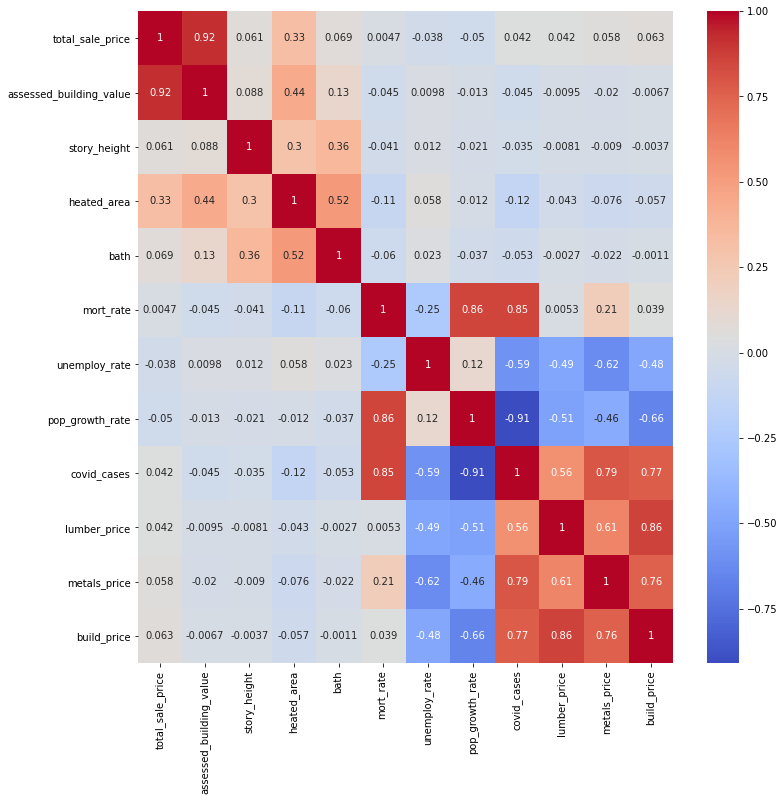

In [24]:
corr = corr_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')